In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Configure plotting
%matplotlib inline
plt.style.use('default')  # Using default style instead of seaborn
sns.set_theme()  # This is the proper way to set seaborn theme

# Read the data
df = pd.read_csv('../data/NetflixViewingHistory.csv')

# Display first few rows
print("First few entries of your Netflix viewing history:")
print(df.head())

First few entries of your Netflix viewing history:
                                    Title     Date
0                            The Diplomat  5/17/25
1  Adolescence: Limited Series: Episode 4  5/17/25
2  Adolescence: Limited Series: Episode 3  5/17/25
3  Adolescence: Limited Series: Episode 2  5/11/25
4  Adolescence: Limited Series: Episode 1  5/11/25


In [2]:
# Let's explore our Netflix data structure and content

# First, convert the Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# 1. Check the basic information about our dataset
print('\n=== Dataset Information ===\n')
print('Number of rows (viewings):', len(df))
print('Number of columns:', len(df.columns))
print('\nColumns in our dataset:')
print(df.columns.tolist())

# 2. Look at data types of each column
print('\n=== Data Types ===\n')
print(df.dtypes)

# 3. Check for missing values
print('\n=== Missing Values ===\n')
print(df.isnull().sum())

# 4. Show some basic statistics with properly formatted dates
print('\n=== Basic Statistics of Your Viewing History ===\n')
print(f'Earliest viewing date: {df["Date"].min().strftime("%Y-%m-%d")}')
print(f'Most recent viewing date: {df["Date"].max().strftime("%Y-%m-%d")}')
print(f'Total unique titles watched: {df["Title"].nunique()}')

# 5. Display the latest 5 shows you've watched
print('\n=== Your Latest 5 Shows ===\n')
print(df.sort_values('Date', ascending=False).head())


=== Dataset Information ===

Number of rows (viewings): 1230
Number of columns: 2

Columns in our dataset:
['Title', 'Date']

=== Data Types ===

Title            object
Date     datetime64[ns]
dtype: object

=== Missing Values ===

Title    0
Date     0
dtype: int64

=== Basic Statistics of Your Viewing History ===

Earliest viewing date: 2021-01-20
Most recent viewing date: 2025-05-17
Total unique titles watched: 1230

=== Your Latest 5 Shows ===

                                    Title       Date
0                            The Diplomat 2025-05-17
2  Adolescence: Limited Series: Episode 3 2025-05-17
1  Adolescence: Limited Series: Episode 4 2025-05-17
3  Adolescence: Limited Series: Episode 2 2025-05-11
4  Adolescence: Limited Series: Episode 1 2025-05-11


/var/folders/8q/0smtzb1173v_2nk1p9492h740000gn/T/ipykernel_65535/844781238.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


=== Your Netflix Viewing Patterns Analysis ===

Number of shows watched per year:
Year
2021    403
2022    336
2023    243
2024    201
2025     47
Name: count, dtype: int64


Your favorite days to watch Netflix:
Weekday
Saturday     247
Sunday       215
Friday       179
Wednesday    169
Tuesday      169
Monday       135
Thursday     116
Name: count, dtype: int64


Your top 5 most watched titles:
Title
The Diplomat                                                   1
Shyam Singha Roy                                               1
Friends: Season 2: The One with Phoebe's Husband               1
Friends: Season 2: The One with Five Steaks and an Eggplant    1
Too Hot to Handle: Season 3: No Pleasure Island                1
Name: count, dtype: int64




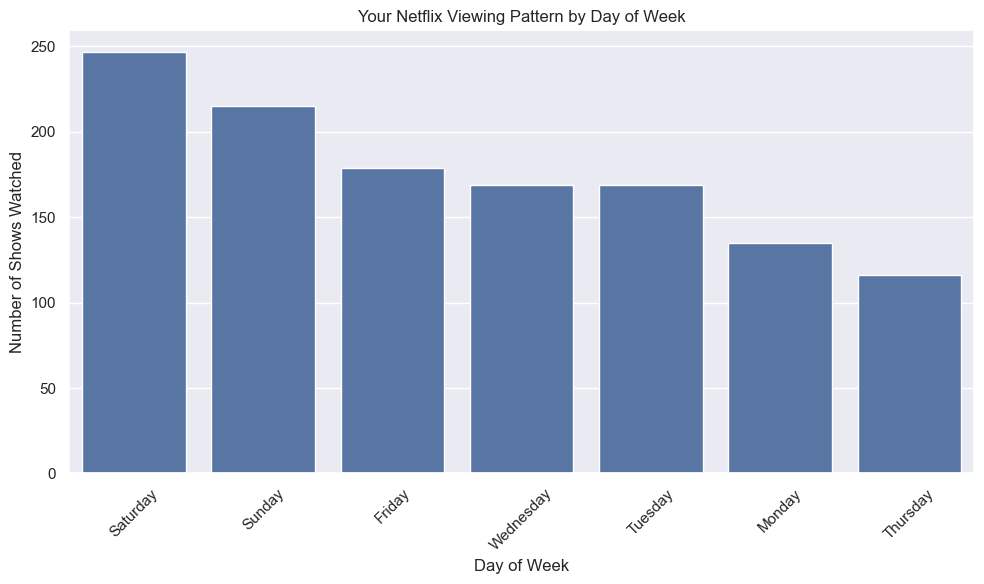


=== Analysis Explanation ===
1. You watch most shows on: Saturday
2. Your most active year was: 2021 with 403 shows watched
3. Your most watched show is: The Diplomat


In [3]:
# Basic Pattern Analysis

# 1. Create time-based features for analysis
# Convert date to datetime if not already done
df['Date'] = pd.to_datetime(df['Date'])

# Extract useful time components
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.day_name()

# 2. Let's analyze your viewing patterns
print("=== Your Netflix Viewing Patterns Analysis ===\n")

# Shows by year
yearly_counts = df['Year'].value_counts().sort_index()
print("Number of shows watched per year:")
print(yearly_counts)
print("\n")

# Shows by day of week
weekday_counts = df['Weekday'].value_counts()
print("Your favorite days to watch Netflix:")
print(weekday_counts)
print("\n")

# Most watched shows
print("Your top 5 most watched titles:")
top_shows = df['Title'].value_counts().head()
print(top_shows)
print("\n")

# Basic visualization of weekly pattern
plt.figure(figsize=(10, 6))
sns.barplot(x=weekday_counts.index, y=weekday_counts.values)
plt.title('Your Netflix Viewing Pattern by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Shows Watched')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Let's explain what we learned
print("\n=== Analysis Explanation ===")
print(f"1. You watch most shows on: {weekday_counts.index[0]}")
print(f"2. Your most active year was: {yearly_counts.idxmax()} with {yearly_counts.max()} shows watched")
print(f"3. Your most watched show is: {top_shows.index[0]}")

In [9]:
# Filter shows watched in 2021
shows_2021 = df[df['Date'].dt.year == 2021]
# Sort by date to see chronological order
shows_2021_sorted = shows_2021.sort_values('Date')

# Display the results in a clean format
print("=== Shows Watched in 2021 ===\n")
print(f"Total shows watched in 2021: {len(shows_2021)}\n")
print("List of shows (chronological order):")
print("--------------------------------")

# Format and display each show with its date
for _, row in shows_2021_sorted.iterrows():
    print(f"{row['Date'].strftime('%Y-%m-%d')}: {row['Title']}")

=== Shows Watched in 2021 ===

Total shows watched in 2021: 403

List of shows (chronological order):
--------------------------------
2021-01-20: Paava Kadhaigal: Oor Iravu
2021-01-22: Mean Girls
2021-01-27: Pihu
2021-02-03: Shadowhunters: The Mortal Instruments: Season 1: The Mortal Cup
2021-02-04: Shadowhunters: The Mortal Instruments: Season 1: Dead Man's Party
2021-02-04: Shadowhunters: The Mortal Instruments: Season 1: The Descent Into Hell Isn't Easy
2021-02-04: Shadowhunters: The Mortal Instruments: Season 2: This Guilty Blood
2021-02-04: Shadowhunters: The Mortal Instruments: Season 1: Morning Star
2021-02-04: Shadowhunters: The Mortal Instruments: Season 1: Malec
2021-02-04: Shadowhunters: The Mortal Instruments: Season 1: This World Inverted
2021-02-04: Shadowhunters: The Mortal Instruments: Season 1: Blood Calls to Blood
2021-02-04: Shadowhunters: The Mortal Instruments: Season 1: Bad Blood
2021-02-04: Shadowhunters: The Mortal Instruments: Season 1: Major Arcana
2021-02-04

In [10]:
# Additional statistics
print("\n=== 2021 Viewing Statistics ===")
print(f"Unique titles watched: {shows_2021['Title'].nunique()}")
print("\nTop 5 most watched shows in 2021:")
print(shows_2021['Title'].value_counts().head())


=== 2021 Viewing Statistics ===
Unique titles watched: 403

Top 5 most watched shows in 2021:
Title
Unfaithful                                     1
The Bold Type: Season 3: Stroke of Genius      1
The Bold Type: Season 2: The Scarlet Letter    1
The Bold Type: Season 2: OMG                   1
The Bold Type: Season 2: Stride of Pride       1
Name: count, dtype: int64


In [11]:
# Filter shows watched in 2022
shows_2022 = df[df['Date'].dt.year == 2022]

shows_2022_sorted = shows_2022.sort_values('Date')

# Display the results in a clean format
print("=== Shows Watched in 2022 ===\n")
print(f"Total shows watched in 2022: {len(shows_2022)}\n")
print("List of shows (chronological order):")
print("--------------------------------")

# Format and display each show with its date
for _, row in shows_2022_sorted.iterrows():
    print(f"{row['Date'].strftime('%Y-%m-%d')}: {row['Title']}")

=== Shows Watched in 2022 ===

Total shows watched in 2022: 336

List of shows (chronological order):
--------------------------------
2022-01-06: Breaking Bad: Season 1: Gray Matter
2022-01-11: The Notebook
2022-01-14: Friends: Season 2: The One with Five Steaks and an Eggplant
2022-01-14: Friends: Season 2: The One with Phoebe's Husband
2022-01-20: Too Hot to Handle: Season 3: No Pleasure Island
2022-01-24: The Last Summer
2022-01-24: Summer Heat: Episode 1
2022-01-24: He's All That
2022-01-30: Oh! Baby (Tamil)
2022-01-30: Shyam Singha Roy
2022-02-07: Dark Desire: Season 1: It's Just Sex
2022-02-08: Venom
2022-02-08: Friends: Season 2: The One with the Baby on the Bus
2022-02-08: The Power of the Dog
2022-02-12: Tall Girl 2
2022-02-13: Friends: Season 2: The One Where Ross Finds Out
2022-02-13: Friends: Season 2: The One with the List
2022-02-14: Friends: Season 2: The One with Phoebe's Dad
2022-02-14: Friends: Season 2: The One with Russ
2022-02-15: Friends: Season 2: The One with t

In [12]:
# Additional statistics
print("\n=== 2022 Viewing Statistics ===")
print(f"Unique titles watched: {shows_2022['Title'].nunique()}")
print("\nTop 5 most watched shows in 2022:")
print(shows_2022['Title'].value_counts().head())


=== 2022 Viewing Statistics ===
Unique titles watched: 336

Top 5 most watched shows in 2022:
Title
Love Today                                             1
Friends: Season 4: The One with the 'Cuffs             1
Friends: Season 3: The One with the Dollhouse          1
Friends: Season 3: The One with a Chick. And a Duck    1
Friends: Season 3: The One with the Screamer           1
Name: count, dtype: int64


In [17]:
# Advanced Pattern Analysis

# 1. Create advanced time-based features
df['Next_Day_Watch'] = df['Date'].diff(-1).dt.days == -1  # Identifies consecutive day watching
df['Days_Between_Shows'] = df['Date'].diff().dt.days      # Days between watches
df['Month_Year'] = df['Date'].dt.to_period('M') 

# 2. Identify potential series by looking for patterns in titles
df['Is_Series'] = df['Title'].str.contains(':|Episode|Season|Chapter|Part')
df['Show_Name'] = df['Title'].str.split(':').str[0] 

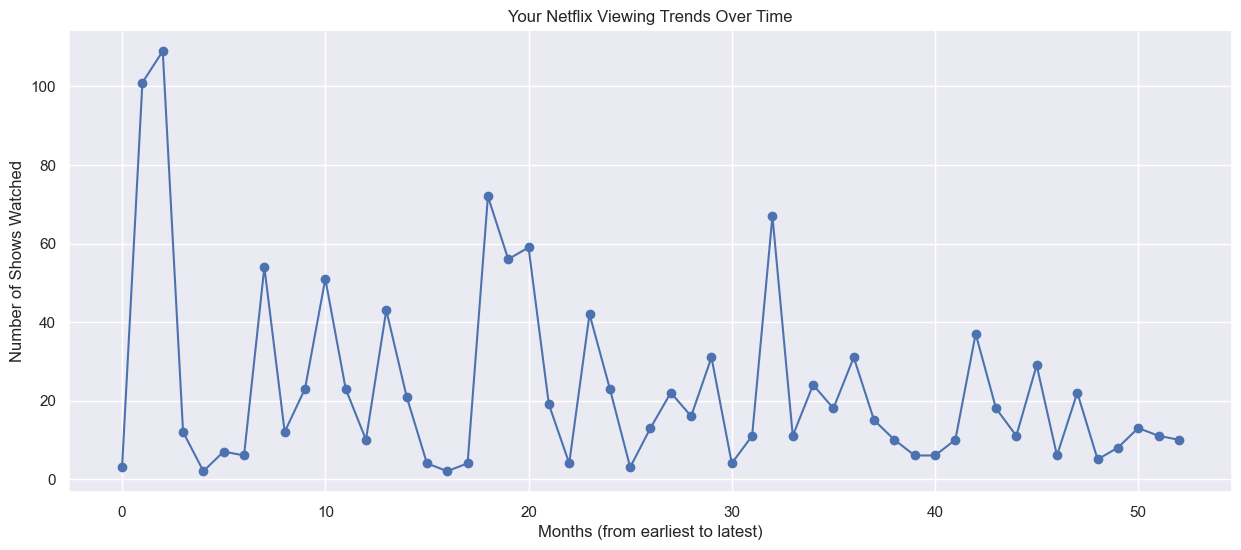

In [18]:
# Create monthly viewing trends visualization
plt.figure(figsize=(15, 6))
monthly_counts = df.groupby('Month_Year').size()
plt.plot(range(len(monthly_counts)), monthly_counts.values, marker='o')
plt.title('Your Netflix Viewing Trends Over Time')
plt.xlabel('Months (from earliest to latest)')
plt.ylabel('Number of Shows Watched')
plt.grid(True)
plt.show()

=== Binge-Watching Analysis ===

Top 5 Shows You Binge-Watched (watched on consecutive days):
Series([], Name: count, dtype: int64)

=== Viewing Habits Analysis ===

Average days between watches: -1.3 days
Longest gap between watches: 0.0 days
Percentage of shows that are series: 76.3%


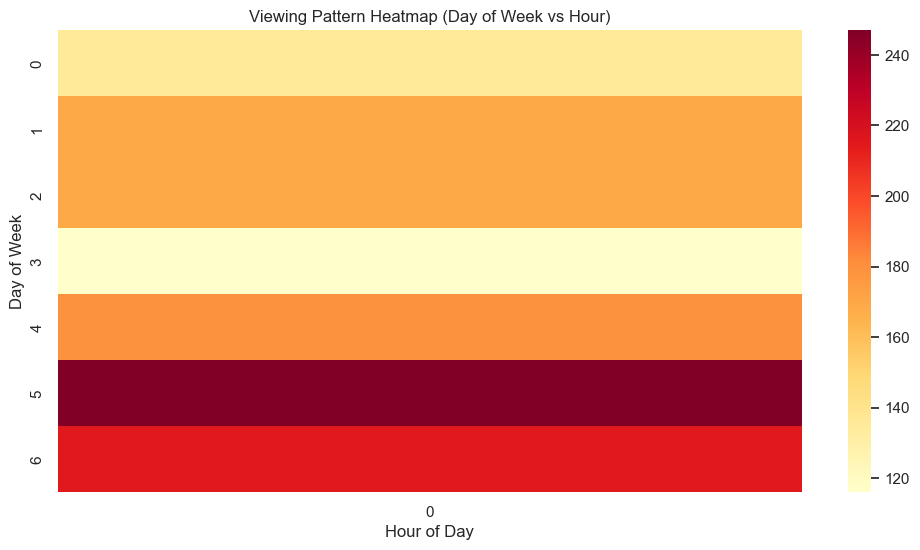

In [20]:

# Analyze binge-watching patterns
print("=== Binge-Watching Analysis ===\n")
binge_series = df[df['Next_Day_Watch']]['Show_Name'].value_counts().head()
print("Top 5 Shows You Binge-Watched (watched on consecutive days):")
print(binge_series)

# Calculate viewing habits
print("\n=== Viewing Habits Analysis ===\n")
print(f"Average days between watches: {df['Days_Between_Shows'].mean():.1f} days")
print(f"Longest gap between watches: {df['Days_Between_Shows'].max()} days")
print(f"Percentage of shows that are series: {(df['Is_Series'].mean() * 100):.1f}%")

# Create watching pattern heatmap
plt.figure(figsize=(12, 6))
viewing_matrix = pd.crosstab(df['Date'].dt.dayofweek, df['Date'].dt.hour)
sns.heatmap(viewing_matrix, cmap='YlOrRd')
plt.title('Viewing Pattern Heatmap (Day of Week vs Hour)')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()